We will be analyzing restaurant data from the different restaurants we specified in Progress Report #1.

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

True

In [2]:
data = pd.read_csv('data/golden-wuish/csv/detailed-reviews-of-golden-wuish.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,GOLDEN WUISH (THE DUCKHOUSE),5,Such a great spot. $88 for flaming table side ...,2024-04-11 02:55:51.899266
1,GOLDEN WUISH (THE DUCKHOUSE),5,Both the bar and the restaurant are highly rec...,2024-04-10 02:55:51.920358
2,GOLDEN WUISH (THE DUCKHOUSE),5,Fantastic work! finally we found closer 100% r...,2024-04-05 02:55:51.928710
3,GOLDEN WUISH (THE DUCKHOUSE),5,The food was fantastic!,2024-04-05 02:55:51.937085
4,GOLDEN WUISH (THE DUCKHOUSE),1,A real shame. They lie about their happy hour....,2024-04-05 02:55:51.945543
...,...,...,...,...
250,GOLDEN WUISH (THE DUCKHOUSE),5,Great cocktails and dumplings!,2022-04-12 02:56:07.394408
251,GOLDEN WUISH (THE DUCKHOUSE),5,"Great cocktails, foods, and service. Love the ...",2022-04-12 02:56:07.398424
252,GOLDEN WUISH (THE DUCKHOUSE),5,Pretty good,2022-04-12 02:56:07.406795
253,GOLDEN WUISH (THE DUCKHOUSE),5,Brand new spot! Great food and drinks with ver...,2022-04-12 02:56:07.415868


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_15183/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,GOLDEN WUISH (THE DUCKHOUSE),5,Such a great spot. $88 for flaming table side ...,2024
1,GOLDEN WUISH (THE DUCKHOUSE),5,Both the bar and the restaurant are highly rec...,2024
2,GOLDEN WUISH (THE DUCKHOUSE),5,Fantastic work! finally we found closer 100% r...,2024
3,GOLDEN WUISH (THE DUCKHOUSE),5,The food was fantastic!,2024
4,GOLDEN WUISH (THE DUCKHOUSE),1,A real shame. They lie about their happy hour....,2024
...,...,...,...,...
250,GOLDEN WUISH (THE DUCKHOUSE),5,Great cocktails and dumplings!,2022
251,GOLDEN WUISH (THE DUCKHOUSE),5,"Great cocktails, foods, and service. Love the ...",2022
252,GOLDEN WUISH (THE DUCKHOUSE),5,Pretty good,2022
253,GOLDEN WUISH (THE DUCKHOUSE),5,Brand new spot! Great food and drinks with ver...,2022


Charts for ratings

<AxesSubplot: >

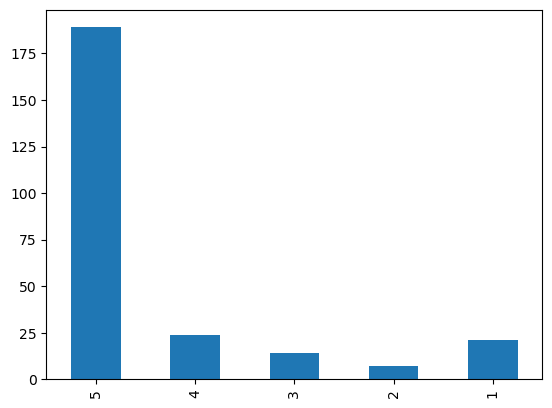

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

<AxesSubplot: title={'center': 'Restaurant Ratings'}, ylabel='rating'>

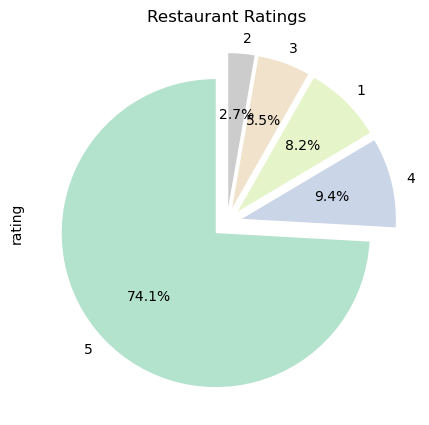

In [5]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 10,
    explode    = (0.1,0.1,0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Restaurant Ratings'
)

df['rating'].value_counts().plot.pie(**kwargs)

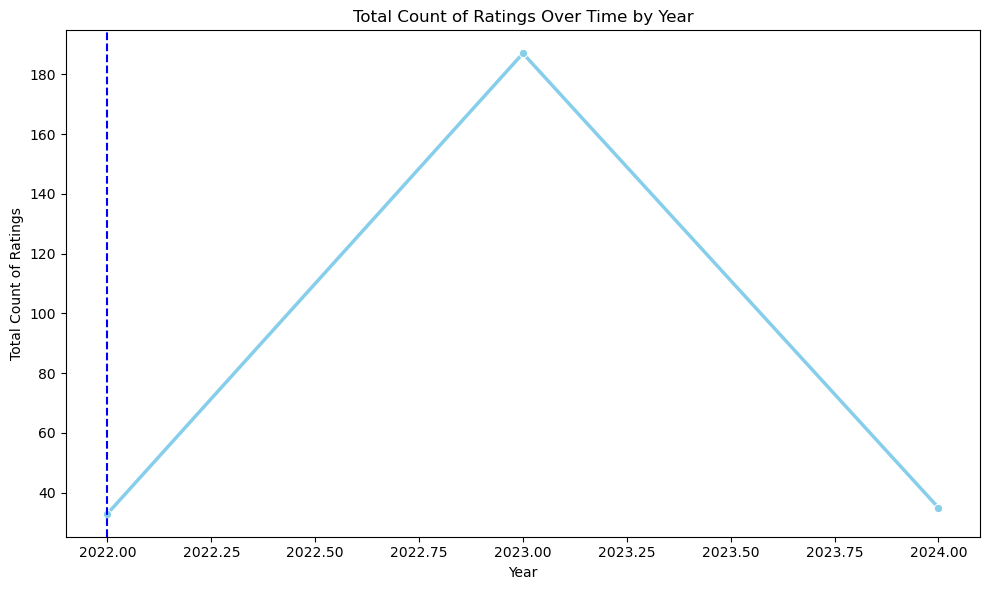

In [6]:
rating_counts = df.groupby(['published_at_date', 'rating']).size().unstack(fill_value=0)

total_ratings_per_year = rating_counts.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_ratings_per_year, marker='o', color='skyblue', linewidth=2.5)
plt.axvline(x=2022, color='blue', linestyle='--', label='Year 2022')


plt.title('Total Count of Ratings Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Count of Ratings')
plt.tight_layout()
plt.show()

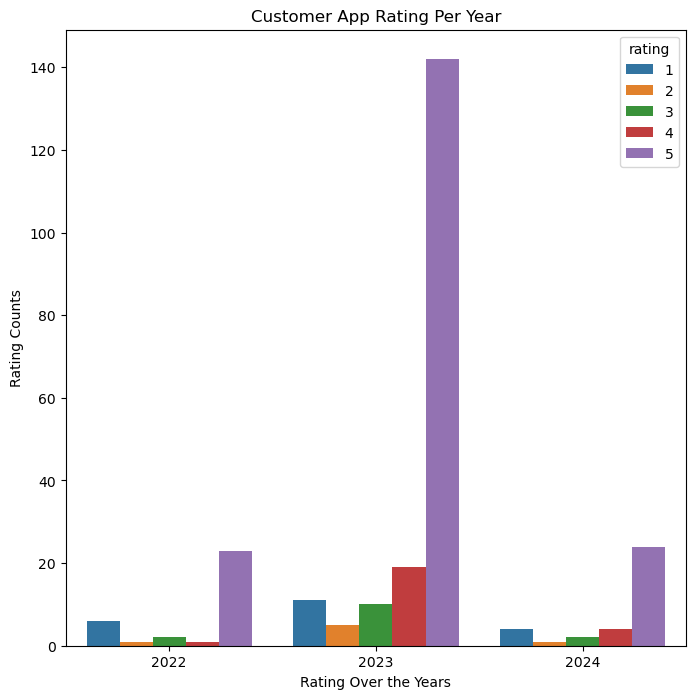

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [8]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_15183/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,Such a great spot. $88 for flaming table side ...
1,Both the bar and the restaurant are highly rec...
2,Fantastic work! finally we found closer 100% r...
3,The food was fantastic!
4,A real shame. They lie about their happy hour....
...,...
250,Great cocktails and dumplings!
251,"Great cocktails, foods, and service. Love the ..."
252,Pretty good
253,Brand new spot! Great food and drinks with ver...


In [9]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [10]:
test_sentence = "Service was excellent, food was delicious, and vibe was great ! We got the korean style boneless fried chicken (sweet chili sauce was fire), veg buckwheat pancake, and spicy chicken. Our server was so kind and attentive & we had a great experience; the sweet treat cookie at end was so cute :)"

preprocess(test_sentence)

'servic excel food delici vibe great korean style boneless fri chicken sweet chili sauc fire veg buckwheat pancak spici chicken server kind attent great experi sweet treat cooki end cute'

In [11]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_15183/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,GOLDEN WUISH (THE DUCKHOUSE),5,Such a great spot. $88 for flaming table side ...,2024,great spot flame tabl side duck great deal amo...
1,GOLDEN WUISH (THE DUCKHOUSE),5,Both the bar and the restaurant are highly rec...,2024,bar restaur highli recommend servic attent fri...
2,GOLDEN WUISH (THE DUCKHOUSE),5,Fantastic work! finally we found closer 100% r...,2024,fantast work final found closer real peke duck...
3,GOLDEN WUISH (THE DUCKHOUSE),5,The food was fantastic!,2024,food fantast
4,GOLDEN WUISH (THE DUCKHOUSE),1,A real shame. They lie about their happy hour....,2024,real shame lie happi hour ask fals menu didn s...


In [12]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('food', 133),
 ('duck', 119),
 ('great', 83),
 ('servic', 78),
 ('good', 72),
 ('amaz', 62),
 ('restaur', 54),
 ('delici', 48),
 ('back', 45),
 ('recommend', 44),
 ('experi', 44),
 ('place', 41),
 ('order', 40),
 ('drink', 38),
 ('peke', 36),
 ('dumpl', 35),
 ('dim', 34),
 ('sum', 32),
 ('soup', 32),
 ('staff', 32),
 ('tast', 30),
 ('nice', 29),
 ('chines', 28),
 ('time', 28),
 ('hour', 27),
 ('dine', 27),
 ('dinner', 25),
 ('attent', 24),
 ('wuish', 23),
 ('atmospher', 23),
 ('cocktail', 22),
 ('dish', 22),
 ('friendli', 21),
 ('happi', 20),
 ('menu', 19),
 ('flame', 18),
 ('tabl', 18),
 ('love', 18),
 ('highli', 17),
 ('noodl', 17),
 ('price', 17),
 ('perfect', 16),
 ('serv', 16),
 ('lamb', 16),
 ('golden', 15),
 ('present', 15),
 ('absolut', 15),
 ('option', 15),
 ('rice', 15),
 ('friend', 14)]

In [13]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_15183/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,GOLDEN WUISH (THE DUCKHOUSE),5,Such a great spot. $88 for flaming table side ...,2024,great spot flame tabl side duck great deal amo...,1
1,GOLDEN WUISH (THE DUCKHOUSE),5,Both the bar and the restaurant are highly rec...,2024,bar restaur highli recommend servic attent fri...,1
2,GOLDEN WUISH (THE DUCKHOUSE),5,Fantastic work! finally we found closer 100% r...,2024,fantast work final found closer real peke duck...,1
3,GOLDEN WUISH (THE DUCKHOUSE),5,The food was fantastic!,2024,food fantast,1
4,GOLDEN WUISH (THE DUCKHOUSE),1,A real shame. They lie about their happy hour....,2024,real shame lie happi hour ask fals menu didn s...,-1
...,...,...,...,...,...,...
250,GOLDEN WUISH (THE DUCKHOUSE),5,Great cocktails and dumplings!,2022,great cocktail dumpl,1
251,GOLDEN WUISH (THE DUCKHOUSE),5,"Great cocktails, foods, and service. Love the ...",2022,great cocktail food servic love peke duck brai...,1
252,GOLDEN WUISH (THE DUCKHOUSE),5,Pretty good,2022,pretti good,1
253,GOLDEN WUISH (THE DUCKHOUSE),5,Brand new spot! Great food and drinks with ver...,2022,brand spot great food drink attent friendli staff,1


<AxesSubplot: xlabel='sentiment', ylabel='count'>

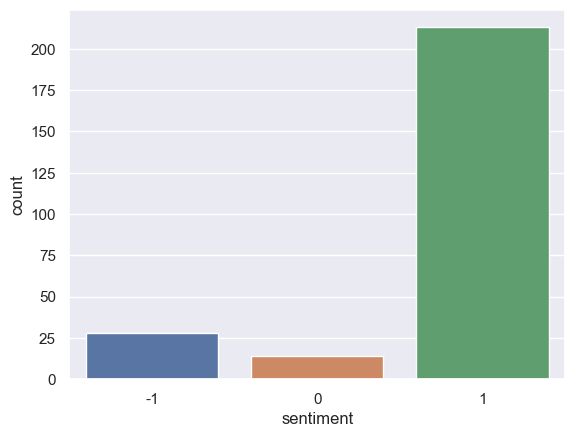

In [14]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [15]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_15183/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0      0.8481
1      0.7351
2      0.6369
3      0.0000
4     -0.3612
        ...  
250    0.6249
251    0.8519
252    0.4404
253    0.6249
254    0.5574
Name: review_sentiment, Length: 255, dtype: float64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.859375

<AxesSubplot: xlabel='published_at_date', ylabel='review_sentiment'>

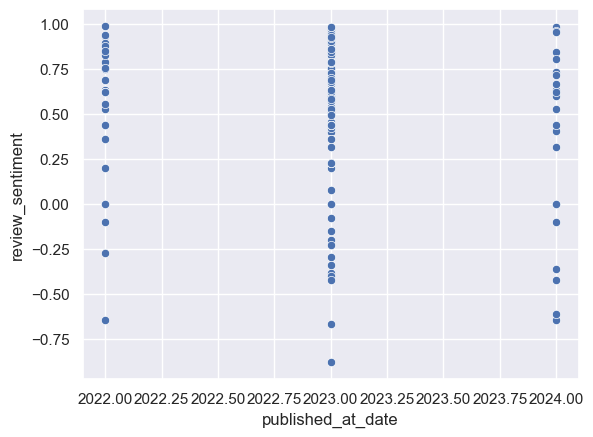

In [19]:
sns.scatterplot(data=df, x='published_at_date', y='review_sentiment')

<AxesSubplot: xlabel='published_at_date', ylabel='review_sentiment'>

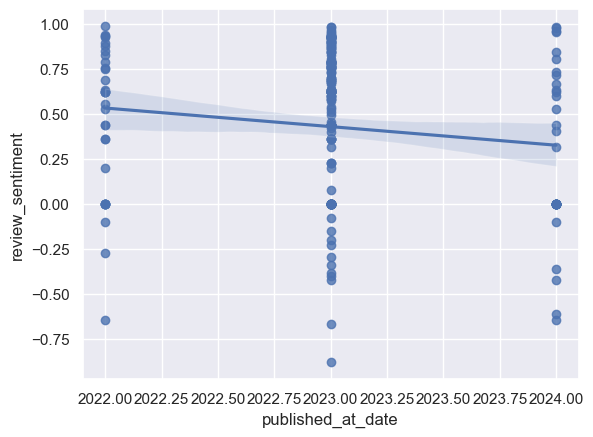

In [20]:
sns.regplot(x="published_at_date", y="review_sentiment", data=df)

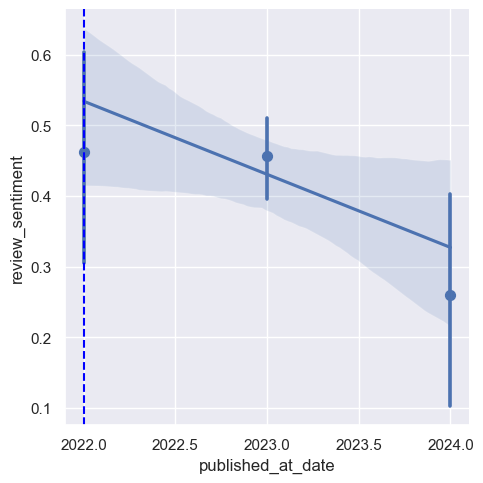

In [21]:
sns.lmplot(x="published_at_date", y="review_sentiment", data=df, x_estimator=np.mean)
plt.axvline(x=2022, color='blue', linestyle='--', label='Year 2022')

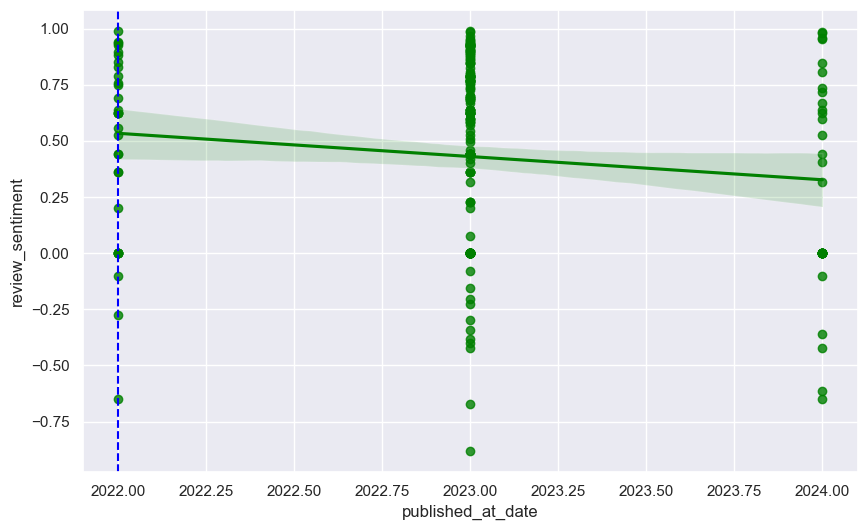

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='green')
plt.axvline(x=2022, color='blue', linestyle='--', label='Year 2022')

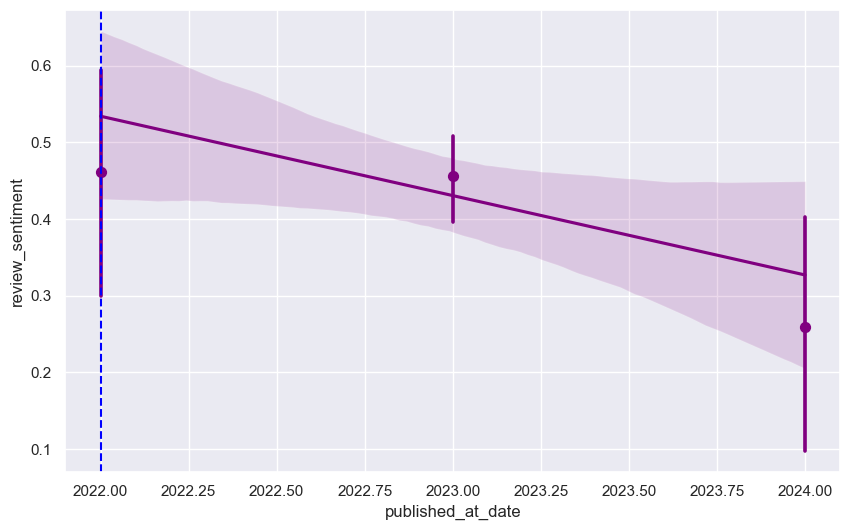

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='purple', x_estimator=np.mean)
plt.axvline(x=2022, color='blue', linestyle='--', label='Year 2022')

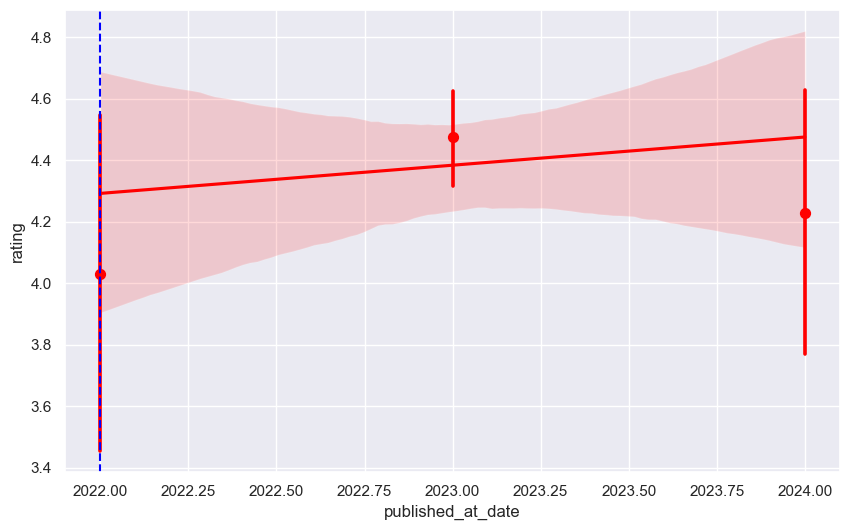

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='rating', marker='o', color='red', x_estimator=np.mean)
plt.axvline(x=2022, color='blue', linestyle='--', label='Year 2022')

In [25]:
# make altered data into csv file
df.to_csv('altdata/' + 'goldenwuish.csv', index=False)